<a href="https://colab.research.google.com/github/arvinantobahtiar/Web-scraping-playstore-app/blob/main/Web_Scraping_googleplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install google-play-scraper
!pip install wordcloud

In [62]:
from google_play_scraper import Sort, reviews, app
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
result, continuation_token = reviews(
    'com.dafturn.mypertamina',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [4]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))

In [16]:
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d7393145-8a62-4946-b1f9-8733899fa76f,Angga Ferdianova,https://play-lh.googleusercontent.com/a-/ALV-U...,Saat pendaftaran selalu di tolak dengan alasan...,1,126,4.0.2,2023-08-30 00:34:55,None,NaT,4.0.2
1,ece29b3b-1f85-40dc-9252-9d80f0776c7c,Hendro Wibowo,https://play-lh.googleusercontent.com/a-/ALV-U...,Khusus wilayah JaTeng ada penomoran ulang kend...,1,104,4.0.2,2023-09-01 11:54:33,None,NaT,4.0.2
2,444b6067-10c2-48d5-bdc9-5aa1e584544d,Fitria Sriani,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasinya bebar-benar menyulitkan , tidak bi...",2,1,4.0.2,2023-10-02 07:09:58,None,NaT,4.0.2
3,89250100-9ed1-486a-b069-4ebc8c1ac110,Restu Hidayatullah,https://play-lh.googleusercontent.com/a-/ALV-U...,Buat apa ada aplikasi kalau spbu nya tidak men...,2,56,4.0.2,2023-08-24 02:22:04,None,NaT,4.0.2
4,089a2947-0674-45ba-ab88-79b45f5ebd43,Gustan Lie,https://play-lh.googleusercontent.com/a-/ALV-U...,"Untuk aplikasinya bagus, bisa kontrol dan anal...",5,95,4.0.2,2023-08-22 02:07:19,None,NaT,4.0.2
...,...,...,...,...,...,...,...,...,...,...,...
995,6bf012e4-d82f-4bd8-acbf-90f8d8dd8892,arry budiman,https://play-lh.googleusercontent.com/a/ACg8oc...,"Log in gbsa, minta kode gk ada mulu, trus gmna...",1,0,3.7.7,2023-04-30 10:48:59,None,NaT,3.7.7
996,dc384fd9-870a-448c-950e-e4fd11a958b5,Rudi Heri S,https://play-lh.googleusercontent.com/a/ACg8oc...,App terlalu banyak d korup d dana.... Y gini j...,1,0,3.7.7,2023-05-15 00:57:58,None,NaT,3.7.7
997,dbdc4110-6ab3-495a-8ec7-357a7f224c7a,ofa zoro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Apalah ni aplikasi,. Bentar bentar error nda b...",1,0,3.8.2,2023-06-29 13:06:54,None,NaT,3.8.2
998,10171cf3-7b3e-4cd7-adfb-9fc78e06056e,Ade Kurniawan,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya pengguna subsidi tepat. Tetapi saya sanga...,1,0,3.7.7,2023-04-19 10:53:03,None,NaT,3.7.7


# Table Creation for the average of score rating on every app version published

In [44]:
version_rating = data[['appVersion', 'meanScore']]

In [48]:
version_rating.drop_duplicates(inplace=True)

<ipython-input-48-1758d86edc2a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
version_rating.dropna(inplace=True)

<ipython-input-50-61940dcdc203>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
version_rating.sort_values(by='appVersion', ascending=True, inplace=True)

<ipython-input-57-b2c89199fb87>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
version_rating.head()

,appVersion,meanScore
883,1.0.7.6,1.000000
737,1.0.7.7,1.666667
494,1.0.7.8,2.000000
508,1.0.8.1,1.000000
450,1.0.8.2,2.000000


# Visualization for the rating on every app version

In [59]:
import plotly.express as px
fig = px.line(version_rating, x="appVersion", y='meanScore')
fig.show()

# Creating wordcloud for all of the comments

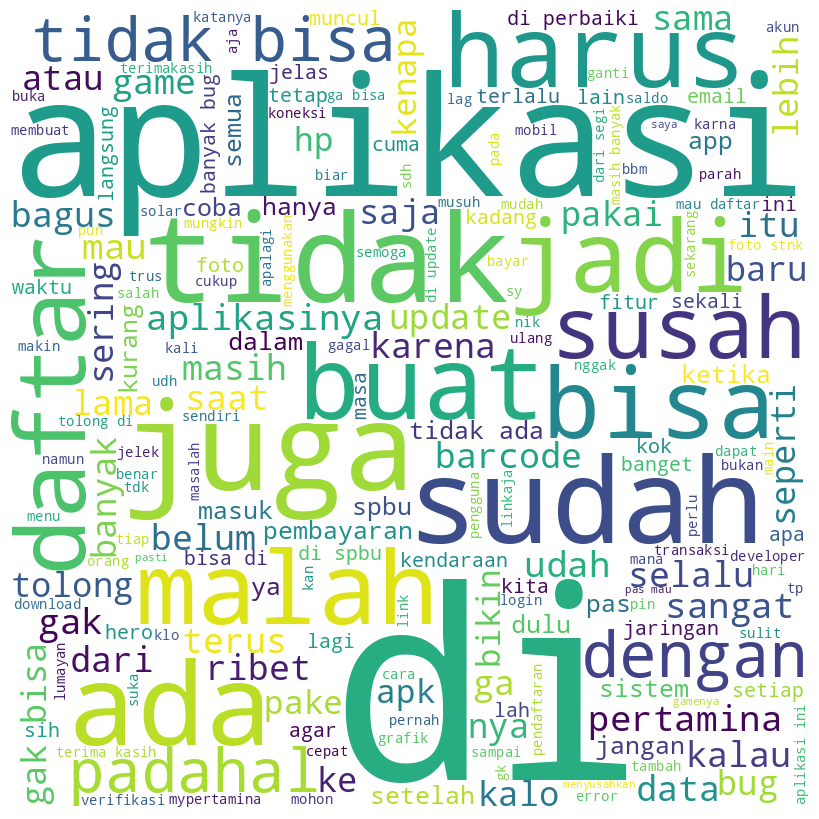

In [67]:
comment_words = ''
stopwords = set(STOPWORDS)

# List of words to remove (kata hubung)
words_to_remove = ['dan', 'yang', 'yg', 'untuk',
                   'saya', 'lagi', 'nya', 'tapi',
                   'ini', 'aja']

# iterate through the csv file
for val in data.content:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

     # Converts each token into lowercase and remove specified words
    tokens = [token.lower() for token in tokens if token.lower() not in words_to_remove]

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()